# Define a marine habitat  
> History | Updated Sep 2023
## Background
The [TurtleWatch project](https://oceanwatch.pifsc.noaa.gov/turtlewatch.html) investigated the overlap between loggerhead sea turtles habitat and fishing effort of the Hawaii-based shallow-set longline fishery in the Pacific Ocean north of the Hawaiian Islands. That fishery, which targets swordfish, used to experience high levels of bycatch of loggerhead turtles. Considerable changes in gear and operations lowered bycatch rate and TurtleWatch was designed as a tool to advise fishermen on areas to avoid to limit bycatch.

Research results indicated that 50% of interactions occurred between 17.5°C and 18.5°C. 


## Objective  
Here we will draw the 17.5 and 18.5ºC temperature contours on a map of satellite sea surface temperature.  

## The exercise demonstrates the following techniques:  
* Subsetting and loading data from an ERDDAP server using xarray  
* Set flag values for features of interest  
* Plotting maps  

## Datasets used
__CoralTemp Sea Surface Temperature__ product from the NOAA Coral Reef Watch program. The NOAA Coral Reef Watch (CRW) daily global 5km Sea Surface Temperature (SST) product, also known as CoralTemp, shows the nighttime ocean temperature measured at the surface. The SST scale ranges from -2 to 35 °C. The CoralTemp SST data product was developed from two related reanalysis (reprocessed) SST products and a near real-time SST product. Spanning January 1, 1985 to the present, the CoralTemp SST is one of the best and most internally consistent daily global 5km SST products available. More information about the product: https://coralreefwatch.noaa.gov/product/5km/index_5km_sst.php


## Install required packages  

In [1]:
import xarray as xr    
import matplotlib.pyplot as plt
import matplotlib as mpl

## Download the SST data
### Select a geographical range

* Select an area of the central North Pacific where the fishery operates: longitude range of 185 to 235 east and latitude range of 20 to 45 north  

### Select a date
* Select a date in the first quarter of the year when bycatch typically occurs: 2023-01-06

### Set variables for the habitat temperature range

In [2]:
# Longitude range
lon_min = 185
lon_max = 235

# Latitude range
lat_min = 20
lat_max = 45

date_for_sat_data = '2023-01-06'

# Turtle habitat temperature range
hab_temp_min = 17.5
hab_temp_max = 18.5

## Open the netCDF file to create an xarray dataset object

In [3]:
url = "https://oceanwatch.pifsc.noaa.gov/erddap/griddap/CRW_sst_v3_1"
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:           (time: 14130, latitude: 3600, longitude: 7200)
Coordinates:
  * time              (time) datetime64[ns] 1985-01-01T12:00:00 ... 2023-09-0...
  * latitude          (latitude) float32 -89.97 -89.93 -89.88 ... 89.93 89.97
  * longitude         (longitude) float32 0.025 0.075 0.125 ... 359.9 360.0
Data variables:
    analysed_sst      (time, latitude, longitude) float64 ...
    sea_ice_fraction  (time, latitude, longitude) float64 ...
Attributes: (12/68)
    acknowledgement:                  NOAA Coral Reef Watch Program
    cdm_data_type:                    Grid
    comment:                          This product is designed to improve on ...
    contributor_name:                 NOAA Coral Reef Watch Program
    contributor_role:                 Collecting source data and deriving pro...
    Conventions:                      CF-1.6, ACDD-1.3, COARDS
    ...                               ...
    time_coverage_duration:           P1D
    time_coverage_end:                2023-09-09T12:00:00Z
    time_coverage_resolution:         P1D
    time_coverage_start:              1985-01-01T12:00:00Z
    title:                            Sea Surface Temperature, Coral Reef Wat...
    Westernmost_Easting:              0.025

## Subset the ERDDAP dataset  
The code below does the following:
* Trims the data to include only SST data  
* Selects the date. To avoid the need to match the exact date found in the dataset, include `method='nearest'`. 
* Slices within the latitude and longitude ranges

In [4]:
ds_subset = ds['analysed_sst'].sel(time=date_for_sat_data, 
                          method='nearest'
                          ).sel(latitude=slice(lat_min, lat_max),
                                longitude=slice(lon_min, lon_max)
                                )


## Make a plot to view the data
This may take a few seconds. So far you have only set the parameters for download but not requested that the data be downloaded. However, downloading will be necessary to plot the data, so xarray will download it. 

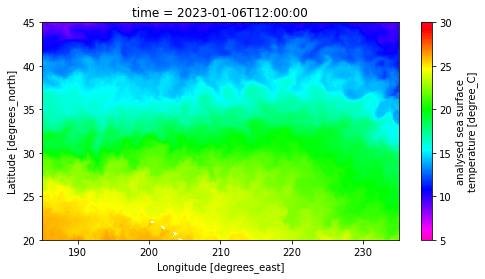

In [6]:
ds_subset.plot.pcolormesh(cmap="gist_rainbow_r",
                          vmin=5,
                          vmax=30,
                          aspect=2,
                          size=4
                          )

## Define and mask the TurtleWatch band
* The band is between 17.5°C and 18.5°C.
* Use the "where" function of xarray to flag all pixels in the habitat range by replacing their values with a value that is much smaller than the data range minimum.

In [7]:
ds_masked = xr.where((ds_subset > hab_temp_min) & (ds_subset < hab_temp_max), 
                     -999,  # Set flag value
                     ds_subset  
                     )

##  Map the masked data 
Make some adjustments to the color map:  
* Set the palette to be the reverse of the gist_rainbow  
* Set missing values (like land..) to gray  
* Set the flag value color 

Text(0.5, 0, 'Longitude')

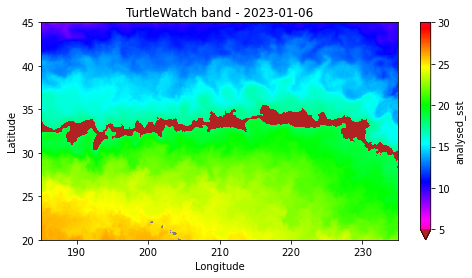

In [8]:
# Create the color palette
cmap = mpl.cm.get_cmap("gist_rainbow_r").copy()

# Set the color of the missing or masked data 
cmap.set_bad(color='gray')  # missing values color (like land..)

# Set the color of flag value (-999)
cmap.set_under(color='firebrick')  # flag value color

# Plot the data
ds_masked.plot.pcolormesh(cmap=cmap,
                          vmin=5,
                          vmax=30,
                          aspect=2,
                          size=4
                          )

# Add plot annotation
plt.title('TurtleWatch band - ' + date_for_sat_data)
plt.ylabel('Latitude')
plt.xlabel('Longitude')

## References
* TurtleWatch: https://oceanwatch.pifsc.noaa.gov/turtlewatch.html

* Several CoastWatch Node websites have data catalogs containing documentation and links to all the datasets available:  
    * https://oceanwatch.pifsc.noaa.gov/doc.html
    * https://coastwatch.pfeg.noaa.gov/data.html
    * https://polarwatch.noaa.gov/catalog/